In [256]:
import pandas as pd
import numpy as np

In [286]:

def datamaker(link,start,end,cl):
    data=pd.DataFrame()
    link=link[:-4]
    w=[]
    for j in range(start,end+1):
        link1=link+str(j)
        dataset=pd.read_html(link1, header=0,attrs = {'class':cl})
        try:
            das=pd.read_html(link1, header=0,attrs = {'class':"wikitable sortable"})
            dataset.append(das)
        except:
            pass
        b=pd.DataFrame()
        for i in range(len(dataset)):
            a=pd.DataFrame(dataset[i])
            if len(pd.DataFrame.count(a,axis=0)):
                b=b.append(a,ignore_index=True)
        b['year']=[str(j)]*b.shape[0]
        w.append([j,b.shape[0]])
        data=data.append(b,ignore_index=True)
    print(w)
    return data

In [287]:
link='https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_2018'
start,end=1920,2020
moviedataset=pd.DataFrame()
moviedataset=moviedataset.append(datamaker(link,start,end,"wikitable"),ignore_index=True)
moviedataset.shape


[[1920, 21], [1921, 38], [1922, 59], [1923, 47], [1924, 68], [1925, 80], [1926, 87], [1927, 93], [1928, 111], [1929, 143], [1930, 110], [1931, 83], [1932, 63], [1933, 70], [1934, 118], [1935, 145], [1936, 130], [1937, 97], [1938, 86], [1939, 78], [1940, 85], [1941, 76], [1942, 96], [1943, 98], [1944, 84], [1945, 71], [1946, 159], [1947, 169], [1948, 143], [1949, 127], [1950, 103], [1951, 100], [1952, 103], [1953, 98], [1954, 125], [1955, 14], [1956, 117], [1957, 116], [1958, 113], [1959, 114], [1960, 112], [1961, 95], [1962, 97], [1963, 90], [1964, 16], [1965, 73], [1966, 68], [1967, 12], [1968, 85], [1969, 93], [1970, 28], [1971, 85], [1972, 97], [1973, 74], [1974, 91], [1975, 80], [1976, 71], [1977, 104], [1978, 58], [1979, 85], [1980, 110], [1981, 101], [1982, 128], [1983, 102], [1984, 129], [1985, 127], [1986, 127], [1987, 106], [1988, 133], [1989, 87], [1990, 115], [1991, 114], [1992, 94], [1993, 118], [1994, 117], [1995, 132], [1996, 105], [1997, 77], [1998, 83], [1999, 94], [200

(9711, 51)

In [247]:
moviedataset.head()

,Title,Director,Cast,Genre,NotesCinematographer,year,Notes,0,Titlesindoor,Notes/Music,Rank,Music,1966rank,1967rank,1968rank,1969rank,1969Rank,Sources,Sources / notes,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,sources,Source,Composer,Music director,Music Director,Gross,No.,Opening,Opening.1,Distributor,Worldwide gross,Domestic Collecion(India),Producer,Production company,Gross[1],Film,Worldwide Gross,Production Company,Rank No.,Ref,Movie,Ref.,Studio,Production house,#+,Implies that the film is multilingual and the gross collection figure includes the worldwide collection of the other simultaneously filmed version.,Studio (production house)
0,Balika Badhu a.k.a. Baby Bride,P. T. Shaida (Tulsidutt Shaida),"Miss Ali, Tarak Bagcha, Pandit Tulsidutt Shaida",Social,"Asiatic Film Corp., Calcutta",1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daksha Yagna a.k.a. Sati Parvati,Vishnupant Divekar,"Khalil, Prabha, Vaidya",Mythology,Kohinoor Film CompanyDOP: A. P. Karandikar,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jalandhar Vrinda a.k.a. Sati Tulsi Vrinda,G. V. Sane,NaN,Mythology,"Hindustan Cinema Film Co., Nasik",1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kansa Vadha a.k.a. End Of The Tyrant King,G. V. Sane,NaN,Mythology,"Hindustan Cinema Film Co., Nasik.[15]",1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Katorabhar Khoon a.k.a.The Stinger Stung a.k.a...,S. N. Patankar,"Trymbakrao Pradhan, Tara Koregaonkar, Baba Vya...",Social,Patankar Friends And Co.DOP: S. N. Patankar,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
data = moviedataset.loc[:,['Title', 'Director', 'Cast', 'Genre', 'year']]

In [249]:
pd.DataFrame.count(data)

Title       9525
Director    8306
Cast        8872
Genre       7185
year        9711
dtype: int64

In [250]:
data.isnull().sum(axis = 0)

Title        186
Director    1405
Cast         839
Genre       2526
year           0
dtype: int64

In [251]:
data.shape

(9711, 5)

In [252]:
data['year'].nunique()

101

In [288]:
data.to_csv('rawmoviefile.csv')

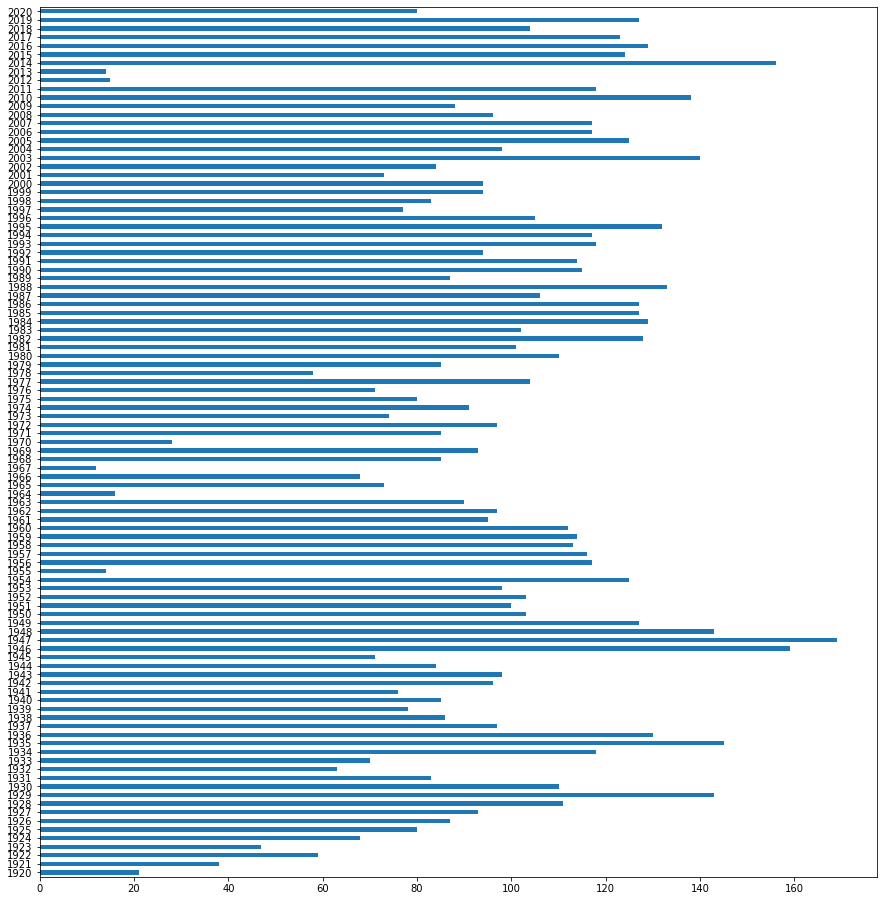

In [254]:
import matplotlib.pyplot as plt
moviedataset.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()